# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | toliara
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ugoofaaru
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | sonoita
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | prineville
Processing Record 20 of Set 1 | nizhniy kuranakh
Processing Record 21 of Set 1 | ke

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,65.23,58,100,15.41,AU,1699415165
1,albany,42.6001,-73.9662,45.68,74,100,1.99,US,1699415165
2,edinburgh of the seven seas,-37.0676,-12.3116,57.40,84,87,26.71,SH,1699415166
3,namibe,-15.1961,12.1522,64.87,81,5,2.57,AO,1699415166
4,toliara,-23.3500,43.6667,79.88,58,5,4.43,MG,1699415166


In [20]:
import os

# Check if the directory exists, if not, create it
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Now you can save your DataFrame into a csv file in the 'output_data' directory
city_data_df.to_csv("output_data/cities.csv", index_label="City")

In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,65.23,58,100,15.41,AU,1699415165
1,albany,42.6001,-73.9662,45.68,74,100,1.99,US,1699415165
2,edinburgh of the seven seas,-37.0676,-12.3116,57.40,84,87,26.71,SH,1699415166
3,namibe,-15.1961,12.1522,64.87,81,5,2.57,AO,1699415166
4,toliara,-23.3500,43.6667,79.88,58,5,4.43,MG,1699415166


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

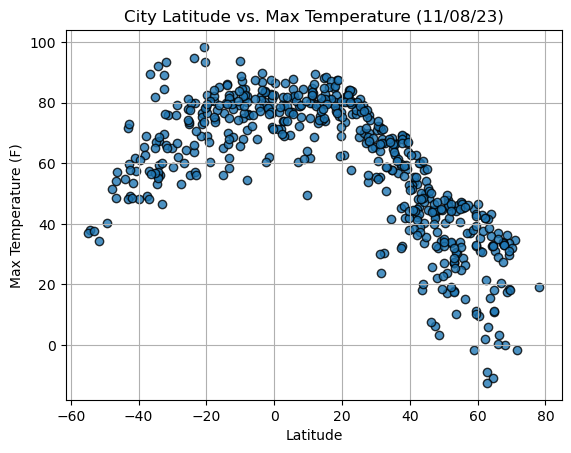

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

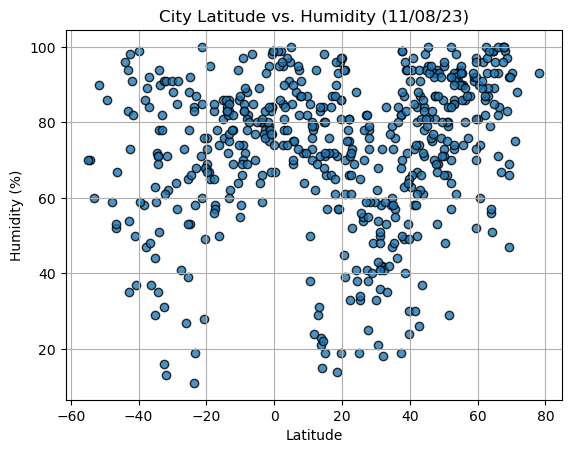

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

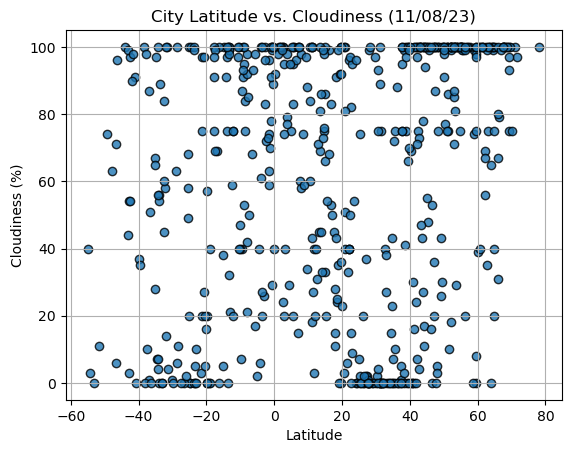

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

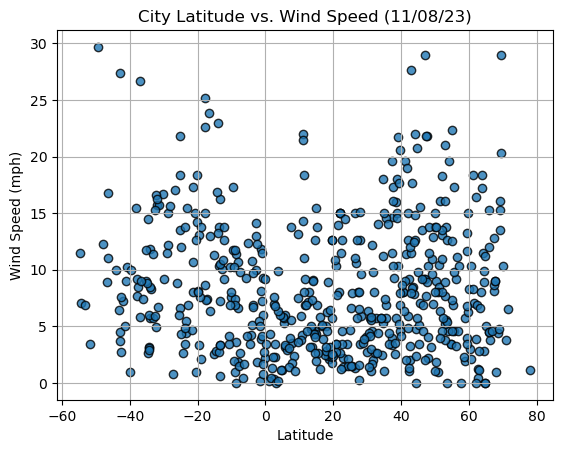

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import matplotlib.pyplot as plt

def create_linregress_plot(x_values, y_values, title, x_label, y_label, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create the plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, slope*x_values + intercept, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()



In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,45.68,74,100,1.99,US,1699415165
9,ugoofaaru,5.6667,73.0000,81.61,75,95,3.15,MV,1699415167
12,sonoita,31.8500,-112.8333,68.14,42,0,2.06,MX,1699415168
15,wailua homesteads,22.0669,-159.3780,82.83,81,40,14.97,US,1699415169
17,prineville,44.2999,-120.8345,40.12,78,17,4.79,US,1699415169


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,65.23,58,100,15.41,AU,1699415165
2,edinburgh of the seven seas,-37.0676,-12.3116,57.40,84,87,26.71,SH,1699415166
3,namibe,-15.1961,12.1522,64.87,81,5,2.57,AO,1699415166
4,toliara,-23.3500,43.6667,79.88,58,5,4.43,MG,1699415166
5,port alfred,-33.5906,26.8910,56.17,90,89,8.28,ZA,1699415166


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7279117488090237


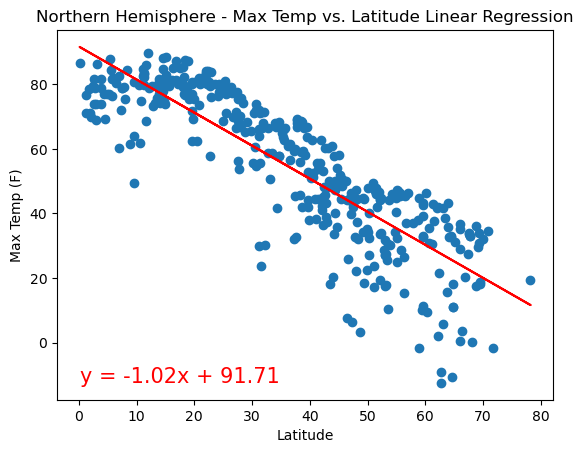

In [26]:
# Linear regression on Northern Hemisphere
create_linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       "Latitude", "Max Temp (F)", "output_data/NorthernMaxTempVsLat.png")

The r-value is: 0.41048021050459305


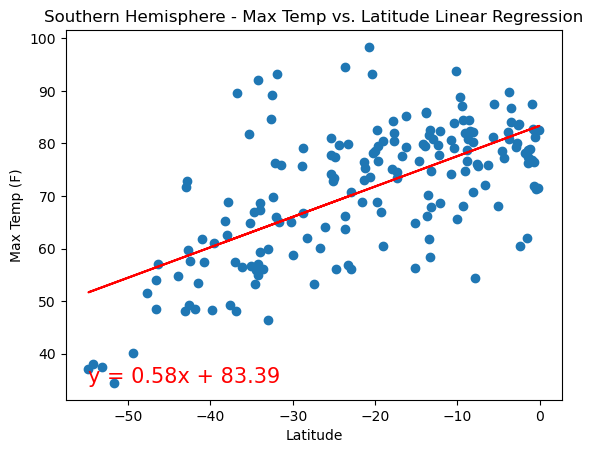

In [27]:
# Linear regression on Southern Hemisphere
create_linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       "Latitude", "Max Temp (F)", "output_data/SouthernMaxTempVsLat.png")

**Discussion about the linear relationship:** 

"The r-value for the Northern Hemisphere is 0.73, indicating a strong negative linear relationship between latitude and max temperature. This suggests that as we move away from the equator towards the North Pole, the maximum temperature decreases.

On the other hand, the r-value for the Southern Hemisphere is 0.41, indicating a moderate positive linear relationship between latitude and max temperature. This suggests that as we move away from the equator towards the South Pole, the maximum temperature also decreases, but the relationship is not as strong as in the Northern Hemisphere.

In both hemispheres, the relationship between latitude and max temperature is as expected: temperatures are highest near the equator and decrease towards the poles. However, the relationship is stronger in the Northern Hemisphere than in the Southern Hemisphere."

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05661000834608442


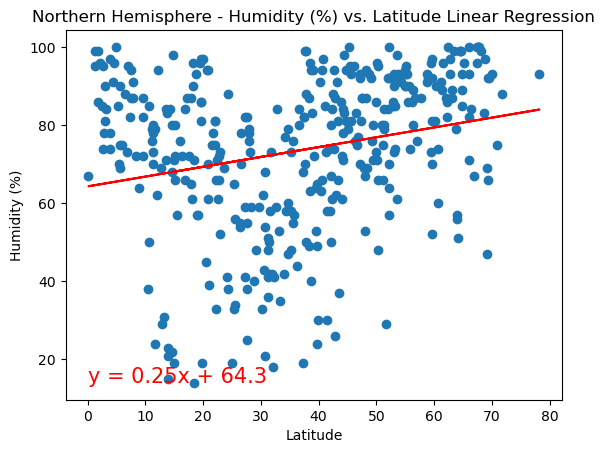

In [28]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
create_linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", 
                       "Latitude", "Humidity (%)", "output_data/NorthernHumidityVsLat.png")

The r-value is: 0.07373290632259479


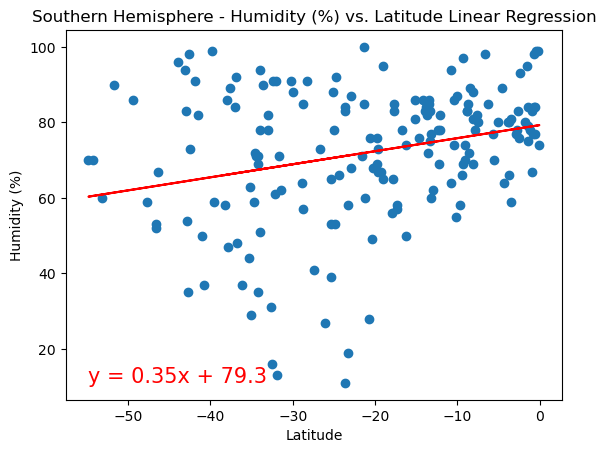

In [29]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
create_linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", 
                       "Latitude", "Humidity (%)", "output_data/SouthernHumidityVsLat.png")

**Discussion about the linear relationship:** 

The linear regression for both the Northern and Southern Hemispheres shows a positive slope in the relationship between latitude and humidity. This suggests a slight upward trend in humidity as we approach the equator in both hemispheres. However, the strength and significance of this trend are indicated by the r-value. A higher r-value would suggest a stronger relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.044303185959284314


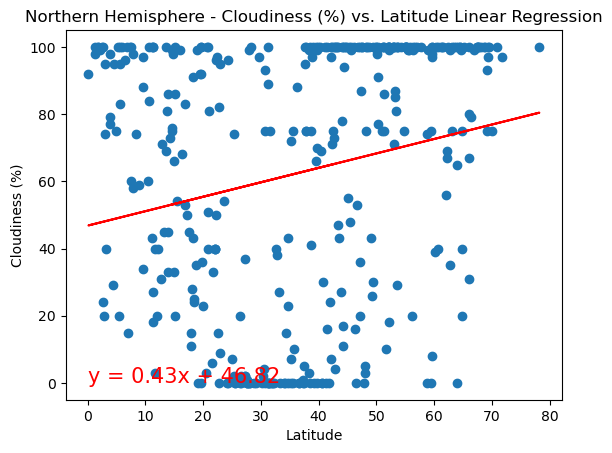

In [30]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
create_linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", "output_data/NorthernCloudinessVsLat.png")

The r-value is: 0.06447878605828067


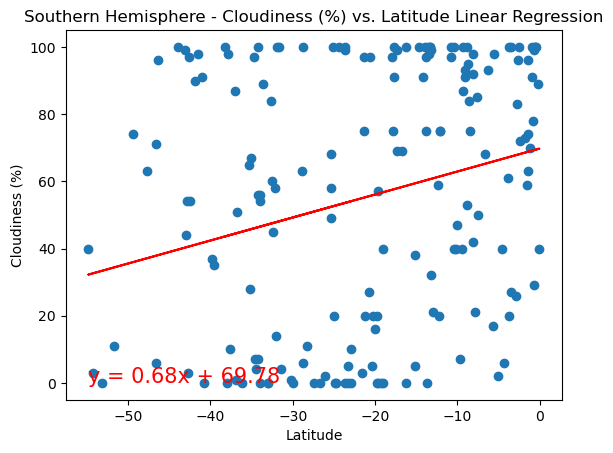

In [31]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
create_linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", "output_data/SouthernCloudinessVsLat.png")

**Discussion about the linear relationship:

The linear regression for both the Northern and Southern Hemispheres shows a positive slope in the relationship between latitude and cloudiness. This suggests a increase in cloudiness as we approach the equator in both hemispheres. However, the strength of this trend is indicated by the r-value, with a higher r-value suggesting a stronger relationship. In both these plots the r-value is less that .1 indicating a weak relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04768037965707613


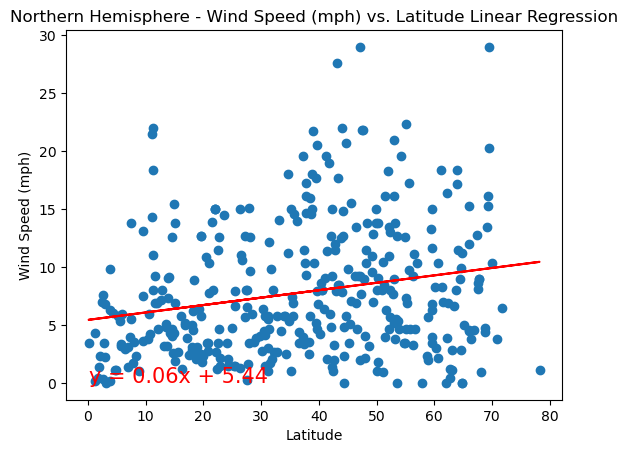

In [32]:
# Northern Hemisphere
create_linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", 
                       "Latitude", "Wind Speed (mph)", "output_data/NorthernWindSpeedVsLat.png")

The r-value is: 0.03778970307381023


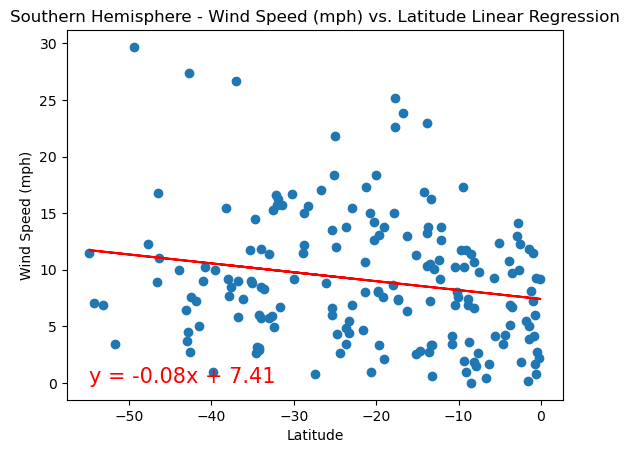

In [33]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
create_linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",
"Latitude", "Wind Speed (mph)", "output_data/SouthernWindSpeedVsLat.png")

**Discussion about the linear relationship:** 

The linear regression for both the Northern and Southern Hemispheres shows a negative slope in the relationship between latitude and wind speed. This suggests a decrease in wind speed as we approach the equator in both hemispheres. However, the strength of this trend is indicated by the r-value, with a higher r-value suggesting a stronger relationship. In both these plots the r-value is less than 0.1, indicating a weak relationship.